# Phase d'Objectifs

# Compréhension du métier

# Phase de données

# Compréhension des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0
mpl.style.use('ggplot') # optional: for ggplot-like style
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import resample

Matplotlib version:  3.1.1


In [2]:
df=pd.read_csv('D:/adult.csv');

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [9]:
df['income']=[0 if x== '<=50K' else 1 for x in df['income']]

In [10]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Préparation de données

In [11]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

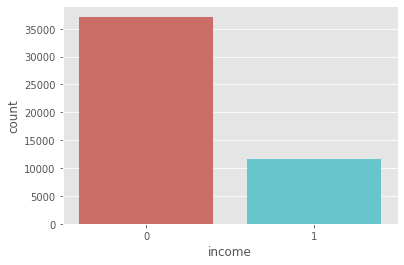

In [12]:
sb.countplot(x='income',data=df,palette='hls')

In [13]:
df_majority = df[df.income==0]
df_minority = df[df.income==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=37155,    
                                 random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.income.value_counts()

1    37155
0    37155
Name: income, dtype: int64

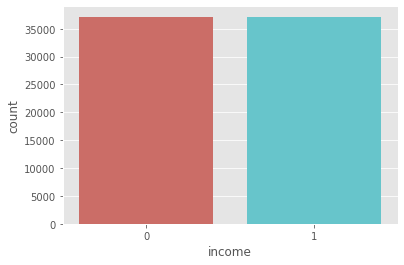

In [14]:
sb.countplot(x='income',data=df_upsampled,palette='hls')

In [15]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

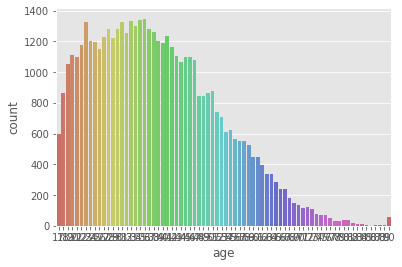

In [16]:
sb.countplot(x='age',data=df,palette='hls')

In [17]:
df["age"]=(df["age"]-df["age"].min())/(df["age"].max()-df["age"].min())
df["age"]

0        0.109589
1        0.287671
2        0.150685
3        0.369863
4        0.013699
           ...   
48837    0.136986
48838    0.315068
48839    0.561644
48840    0.068493
48841    0.479452
Name: age, Length: 48842, dtype: float64

In [18]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

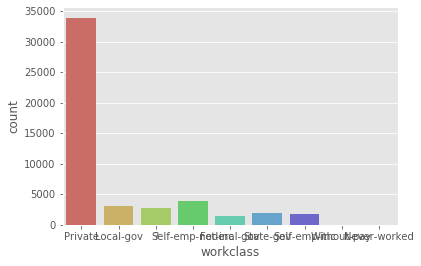

In [19]:
sb.countplot(x='workclass',data=df,palette='hls')

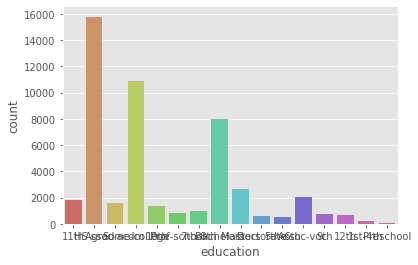

In [20]:
sb.countplot(x='education',data=df,palette='hls')

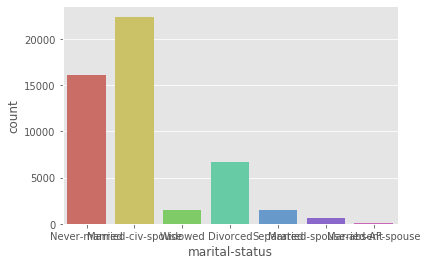

In [21]:
sb.countplot(x='marital-status',data=df,palette='hls')

In [22]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

In [23]:
df["capital-gain"]=(df["capital-gain"]-df["capital-gain"].min())/(df["capital-gain"].max()-df["capital-gain"].min())
df["capital-gain"]

0        0.000000
1        0.000000
2        0.000000
3        0.076881
4        0.000000
           ...   
48837    0.000000
48838    0.000000
48839    0.000000
48840    0.000000
48841    0.150242
Name: capital-gain, Length: 48842, dtype: float64

In [24]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

In [25]:
df["capital-loss"]=(df["capital-loss"]-df["capital-loss"].min())/(df["capital-loss"].max()-df["capital-loss"].min())
df["capital-loss"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48837    0.0
48838    0.0
48839    0.0
48840    0.0
48841    0.0
Name: capital-loss, Length: 48842, dtype: float64

In [26]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

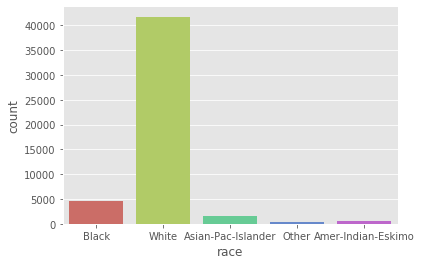

In [27]:
sb.countplot(x='race',data=df,palette='hls')

In [28]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

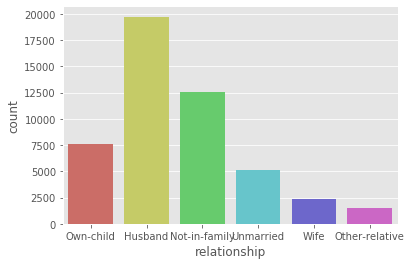

In [29]:
sb.countplot(x='relationship',data=df,palette='hls')

In [30]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

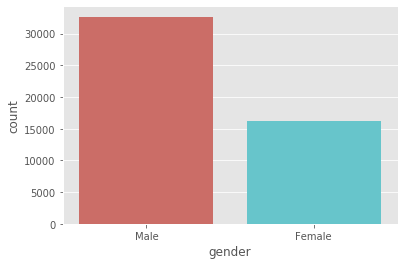

In [31]:
sb.countplot(x='gender',data=df,palette='hls')

In [32]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

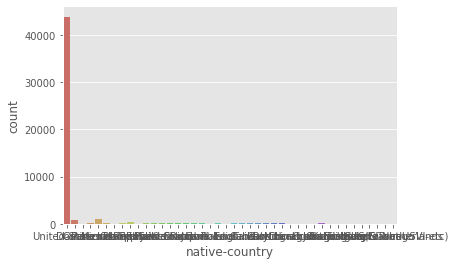

In [33]:
sb.countplot(x='native-country',data=df,palette='hls')

In [34]:
df['hours-per-week'].value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

In [35]:
df["hours-per-week"]=(df["hours-per-week"]-df["hours-per-week"].min())/(df["hours-per-week"].max()-df["hours-per-week"].min())
df["hours-per-week"]

0        0.397959
1        0.500000
2        0.397959
3        0.397959
4        0.295918
           ...   
48837    0.377551
48838    0.397959
48839    0.397959
48840    0.193878
48841    0.397959
Name: hours-per-week, Length: 48842, dtype: float64

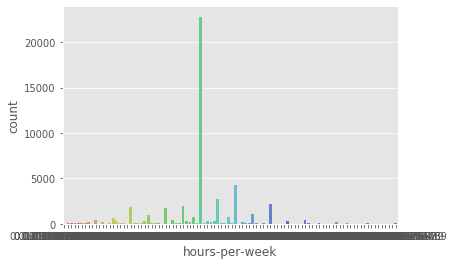

In [36]:
sb.countplot(x='hours-per-week',data=df,palette='hls')

In [37]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

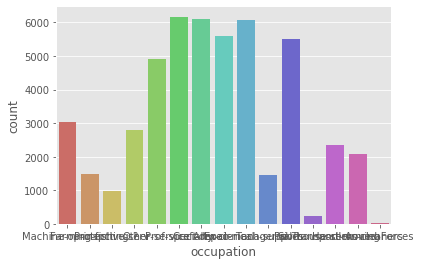

In [38]:
sb.countplot(x='occupation',data=df,palette='hls')

In [39]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

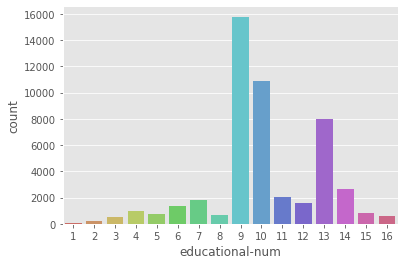

In [40]:
sb.countplot(x='educational-num',data=df,palette='hls')

In [41]:
print(df.replace("?", "other"))

            age     workclass  fnlwgt     education  educational-num  \
0      0.109589       Private  226802          11th                7   
1      0.287671       Private   89814       HS-grad                9   
2      0.150685     Local-gov  336951    Assoc-acdm               12   
3      0.369863       Private  160323  Some-college               10   
4      0.013699         other  103497  Some-college               10   
...         ...           ...     ...           ...              ...   
48837  0.136986       Private  257302    Assoc-acdm               12   
48838  0.315068       Private  154374       HS-grad                9   
48839  0.561644       Private  151910       HS-grad                9   
48840  0.068493       Private  201490       HS-grad                9   
48841  0.479452  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  

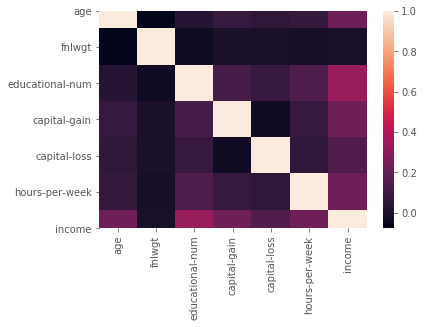

In [42]:
sb.heatmap(df.corr())

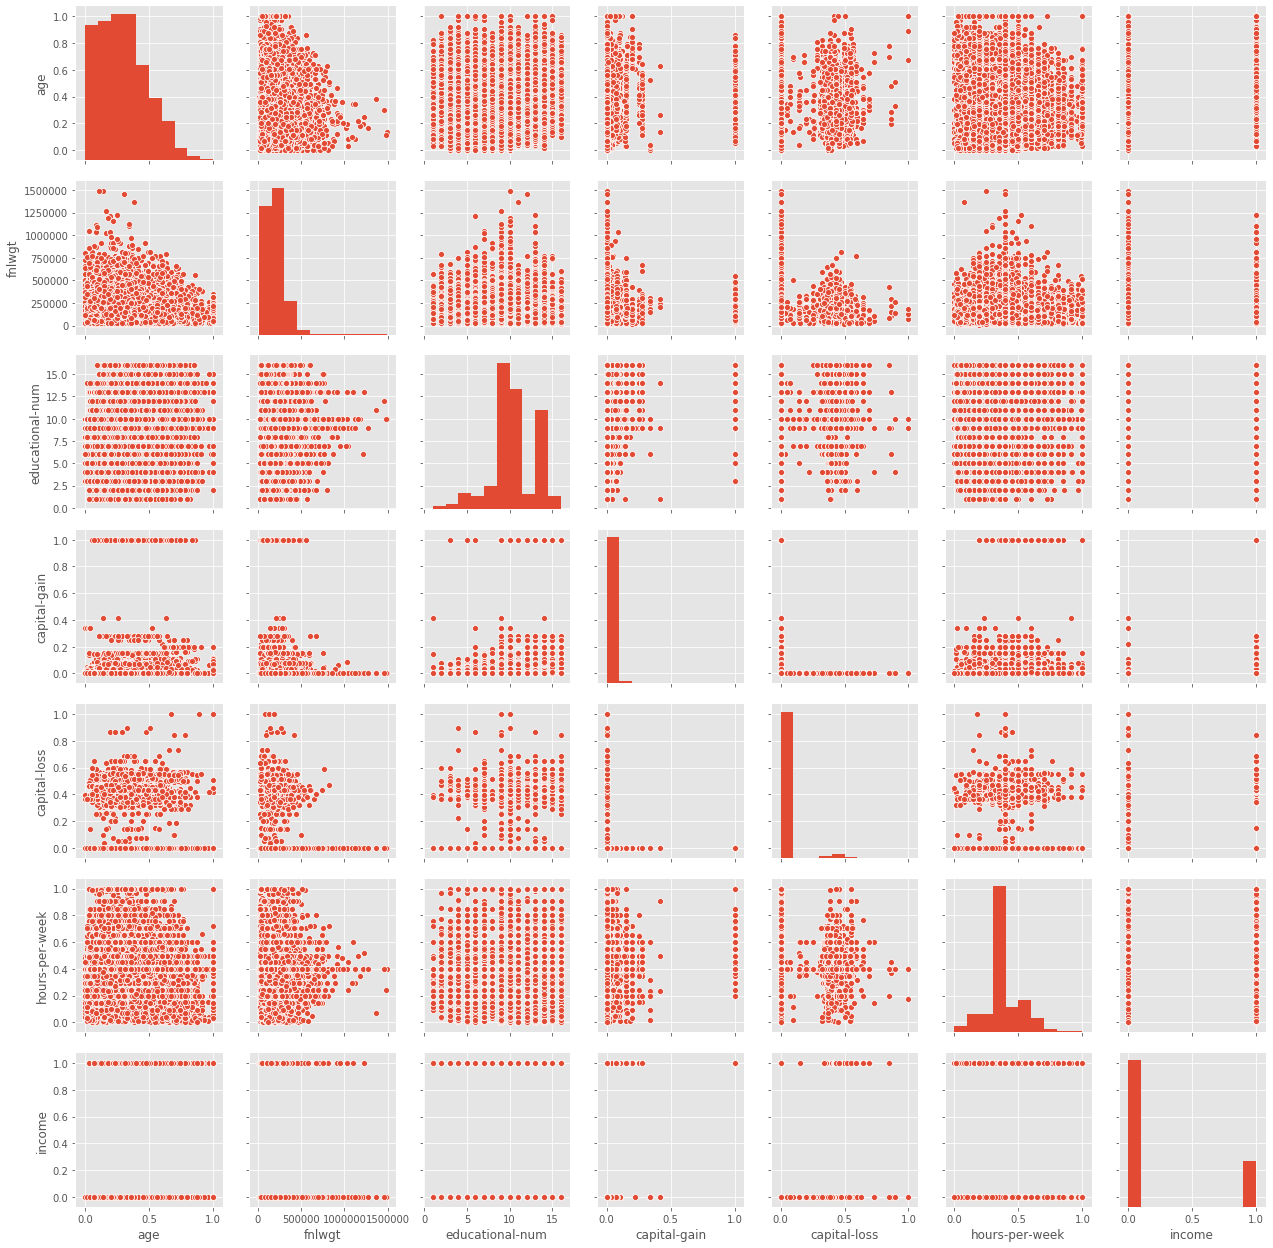

In [43]:
sb.pairplot(df)

In [44]:
y = df_upsampled.income
X = df_upsampled.drop('income', axis=1)

In [45]:
print(X['education'].value_counts().sort_values(ascending=False).head(10))

HS-grad         21113
Some-college    15488
Bachelors       15251
Masters          5917
Assoc-voc        3243
Assoc-acdm       2495
Prof-school      2120
11th             2016
10th             1560
Doctorate        1494
Name: education, dtype: int64


In [46]:
pd.get_dummies(X['education']).head(5)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [47]:
print(X['native-country'].value_counts().sort_values(ascending=False).head(10))

United-States    67100
?                 1306
Mexico            1049
Philippines        482
Germany            361
Canada             331
India              289
Puerto-Rico        226
England            222
Cuba               218
Name: native-country, dtype: int64


In [48]:
X['native-country']=['United-States' if x=='United-States' else 'other' for x in X['native-country']]
print(X['native-country'].value_counts().sort_values(ascending=False).head(10))

United-States    67100
other             7210
Name: native-country, dtype: int64


In [49]:
print(y.value_counts().sort_values(ascending=False).head(10))

0    37155
1    37155
Name: income, dtype: int64


In [50]:
to_dummy_list=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

In [51]:
def dummy(df,to_dummy_list):
    for x in to_dummy_list:
        dummies=pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df

In [52]:
X=dummy(X,to_dummy_list)
print(X.head(5))

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
4   18  103497               10             0             0              30   
5   34  198693                6             0             0              30   
6   29  227026                9             0             0              40   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
4            1                      0                    0   
5            0                      0                    0   
6            1                      0                    0   

   workclass_Never-worked  ...  relationship_Wife  race_Amer-Indian-Eskimo  \
0                       0  ...                  0                        0

In [53]:
X.isnull().sum().sort_values(ascending=False).head()

native-country_other    0
education_Bachelors     0
education_1st-4th       0
education_5th-6th       0
education_7th-8th       0
dtype: int64

In [54]:
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
def find_outliers(x):
    x_scaled=scale(list(map(float,x)))
    kde=KDEUnivariate(x_scaled)
    kde.fit(bw="scott",fft=True)
    pred=kde.evaluate(x_scaled)
    n=sum(pred<0.05)
    outlier_ind=np.asarray(pred).argsort()[:n]
    outlier_value=np.asarray(x)[outlier_ind]
    return outlier_ind,outlier_value

In [55]:
#kde_indice,kde_values=find_outliers(X['age'])
#print(np.sort(kde_values))

In [56]:
def plot_histogram(x):
    plt.hist(x,color="blue",alpha=0.5)
    plt.title("histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

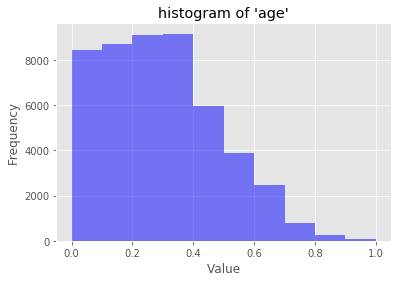

In [57]:
plot_histogram(df['age'])

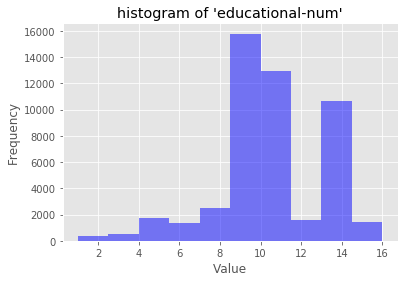

In [58]:
plot_histogram(df['educational-num'])

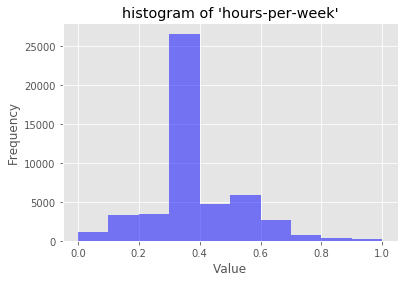

In [59]:
plot_histogram(df['hours-per-week'])

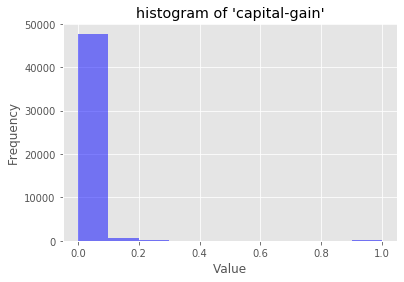

In [60]:
plot_histogram(df['capital-gain'])

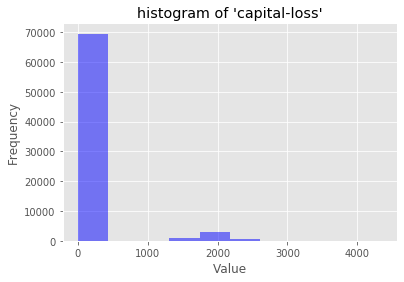

In [61]:
plot_histogram(X['capital-loss'])

In [62]:
def plot_histogram_dv(x,y):
    plt.hist(list(x[y==0]),alpha=0.5,label='DV=0')
    plt.hist(list(x[y==1]),alpha=0.5,label='DV=11')
    plt.title("histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

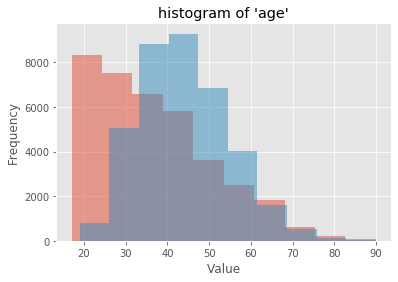

In [63]:
plot_histogram_dv(X['age'],y)

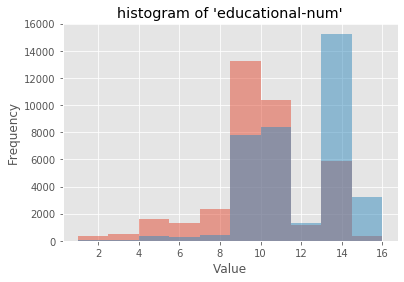

In [64]:
plot_histogram_dv(X['educational-num'],y)

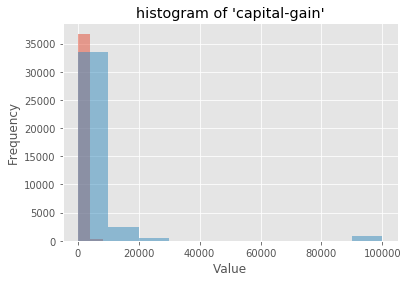

In [65]:
plot_histogram_dv(X['capital-gain'],y)

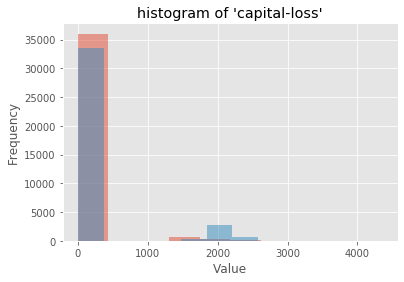

In [66]:
plot_histogram_dv(X['capital-loss'],y)

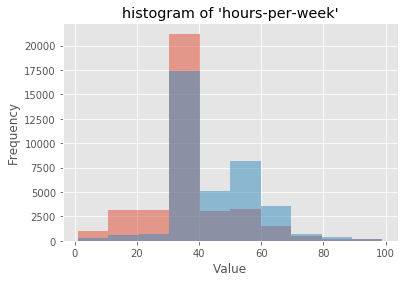

In [67]:
plot_histogram_dv(X['hours-per-week'],y)

# Phase de traitements

# Modélisation

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(df.shape)
print(X.shape)
# Train model
clf_1 = LogisticRegression().fit(X, y)
clf_2 = GaussianNB().fit(X, y)
clf_3 = KNeighborsClassifier().fit(X, y)
clf_4 = DecisionTreeClassifier().fit(X, y)
clf_5 = LinearDiscriminantAnalysis().fit(X, y)

(48842, 15)
(74310, 68)


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# Evaluation de la modélisation

In [69]:
pred_y_1 = clf_1.predict(X)
print('Accuracy using LogisticRegression: ', accuracy_score(y, pred_y_1) )
pred_y_2 = clf_2.predict(X)
print('Accuracy using Gaussian Naive Bayes: ',accuracy_score(y, pred_y_2) )
pred_y_3 = clf_3.predict(X)
print('Accuracy using KNeighborsClassifier: ',accuracy_score(y, pred_y_3) )
pred_y_4 = clf_4.predict(X)
print('Accuracy using DecisionTreeClassifier: ',accuracy_score(y, pred_y_4) )
pred_y_5 = clf_5.predict(X)
print('Accuracy using LinearDiscriminantAnalysis: ',accuracy_score(y, pred_y_5) )

Accuracy using LogisticRegression:  0.8198492800430629
Accuracy using Gaussian Naive Bayes:  0.6302247342215045
Accuracy using KNeighborsClassifier:  0.8568294980487149
Accuracy using DecisionTreeClassifier:  0.999946171443951
Accuracy using LinearDiscriminantAnalysis:  0.8093930830305477
